In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# To read data

In [4]:
df=pd.read_csv(r'C:\Users\Paresh H Waikar\Downloads\Fish.csv')
print(df)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [5]:
print('Shape of data =',df.shape)

Shape of data = (159, 7)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# To find missing values

In [9]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# Count of species

In [12]:
sp_count = df.Species.value_counts()
print(sp_count)

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


In [14]:
sp_count = pd.DataFrame(sp_count)
sp_count.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


Text(0, 0.5, 'count of species')

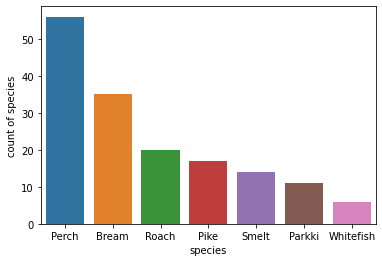

In [17]:
sns.barplot(x=sp_count.index,y=sp_count.Species)
plt.xlabel('species')
plt.ylabel('count of species')

In [18]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

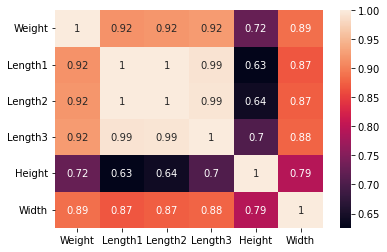

In [19]:
sns.heatmap(df.corr(),annot=True)

# High amount of corelatin b/w independent variable are affect the model accuracy

In [21]:
df1 = df.drop(['Length1','Length2','Length3'],axis=1)
print(df1)

    Species  Weight   Height   Width
0     Bream   242.0  11.5200  4.0200
1     Bream   290.0  12.4800  4.3056
2     Bream   340.0  12.3778  4.6961
3     Bream   363.0  12.7300  4.4555
4     Bream   430.0  12.4440  5.1340
..      ...     ...      ...     ...
154   Smelt    12.2   2.0904  1.3936
155   Smelt    13.4   2.4300  1.2690
156   Smelt    12.2   2.2770  1.2558
157   Smelt    19.7   2.8728  2.0672
158   Smelt    19.9   2.9322  1.8792

[159 rows x 4 columns]


# Detection of outliers

Text(0.5, 1.0, 'Outlier Detection based on Weight')

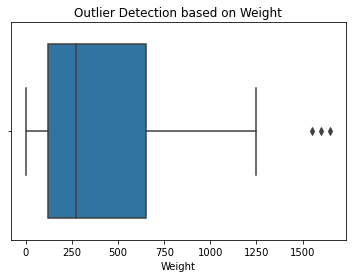

In [23]:
sns.boxplot(x=df1['Weight'])
plt.title('Outlier Detection based on Weight')

Text(0.5, 1.0, 'Outlier Detection based on Height')

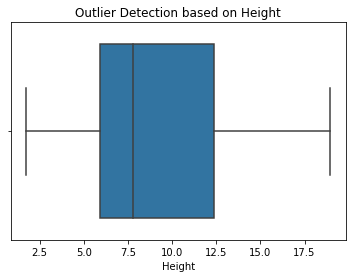

In [24]:
sns.boxplot(x =df1['Height'])
plt.title('Outlier Detection based on Height')

Text(0.5, 1.0, 'Outlier Detection based on Width')

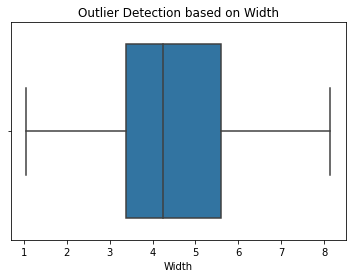

In [25]:
sns.boxplot(x = df1['Width'])
plt.title('Outlier Detection based on Width')


# We found only outliers in weight, so we will remove that

In [26]:
def outlier_detection(dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier


In [28]:
outlier_detection(df1['Weight'])


142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [29]:
df2 = df1.drop([142,143,144])
df2.shape

(156, 4)

In [30]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


In [31]:
X = df2[['Height','Width']] 
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [32]:
y = df2[['Weight']]
y.head(5)

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


# create train and test deta set

In [33]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [46]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (124, 2)
X_test dimension=  (32, 2)
y_train dimension=  (124, 1)
y_train dimension=  (32, 1)


In [40]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [49]:
print('coef= ', model.coef_) # Since we have two features(Height and Width), there will be 2 coef
print('intercept= ', model.intercept_)
print('score= ', model.score(X_test,y_test))
print('score= ', model.score(X_train,y_train))

coef=  [[  9.32525809 152.28174651]]
intercept=  [-376.11369337]
score=  0.8635790946967571
score=  0.8613522656210204


# Predicting the test data

In [43]:
y_prediction =  model.predict(X_test)
y_prediction


array([[ 258.84035616],
       [ 278.26296832],
       [ 218.33194717],
       [ 114.60734812],
       [ 678.90970725],
       [ 806.1815965 ],
       [ 224.72377883],
       [ 388.78485103],
       [ 232.18417294],
       [ 514.17095802],
       [ 631.06715852],
       [ 283.75062175],
       [ 617.58178659],
       [ 869.9661715 ],
       [ 626.43584193],
       [ 752.41943234],
       [ 817.29858371],
       [ 321.78531418],
       [-160.20777988],
       [ 148.00699556],
       [ 321.05229908],
       [ 551.45209663],
       [ 417.36106654],
       [ 511.77911706],
       [ 750.68102302],
       [ 349.78566772],
       [ 195.44945144],
       [ 348.86764603],
       [ 284.7831825 ],
       [ 265.81250737],
       [ 271.23653309],
       [-161.95396719]])

In [44]:
predictedWeight = pd.DataFrame(model.predict(X_test), columns=['Predicted Weight'])
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Weight,225.000000,200.000000,110.000000,70.000000,700.000000,1000.000000,150.000000,430.000000,145.000000,770.000000,...,500.000000,500.000000,955.000000,265.000000,145.000000,270.000000,180.000000,145.000000,160.000000,8.700000
Predicted Weight,258.840356,278.262968,218.331947,114.607348,678.909707,806.181597,224.723779,388.784851,232.184173,514.170958,...,417.361067,511.779117,750.681023,349.785668,195.449451,348.867646,284.783182,265.812507,271.236533,-161.953967
